### Introduction

In the real estate market, homeowners often seek ways to maximize their property values, whether preparing to sell or enhancing their investment. This project aims to provide insights on home valuation and how various renovations can increase their estimated value. By leveraging data on homes in King County, we aim to help homeowners make informed decisions regarding their property.

### Problem Statement

Homeowners and real estate agents often face the challenge of accurately predicting home values and identifying which renovations will yield the highest return on investment. Inaccurate valuations can affect home sales and lead to significant losses for both buyers and sellers. Uninformed renovation decisions can result in unnecessary expenditures without a corresponding increase in property value. For a real estate agency that helps homeowners buy and sell homes, providing accurate home valuations and precise advice on effective renovations is crucial.

### Objectives:
1. **Develop a model that accurately predicts the value of a house based on its features.**
    - Investigate the most important features in homes to create an accurate model for estimating home value.
2. **Explore and quantify the relationship between renovations and property value and refine the model based on the results.**
    - Determine whether renovations affect home prices. If a relationship exists, quantify it and refine the model to improve accuracy.
3. **Offer tailored recommendations to homeowners based on their property characteristics and market conditions.**
    - Provide homeowners with accurate property valuations and advise on whether renovations would be a worthwhile investment if they intend to sell.

By analyzing housing data, this project will develop a predictive model to guide homeowners in making strategic renovation investments that enhance property value.


# Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Data loading, and inspection

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df. columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



# EDA And Data Cleaning

In [6]:
df.shape

(21597, 21)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 12 columns (or variables) in the DataFrame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#drop unnecessary columns
df = df.drop(columns= ['date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'])

In [9]:
#drop duplicates
df = df.drop_duplicates(subset= ['id'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  int64  
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  float64
 4   sqft_living   21420 non-null  int64  
 5   sqft_lot      21420 non-null  int64  
 6   floors        21420 non-null  float64
 7   waterfront    19067 non-null  float64
 8   condition     21420 non-null  int64  
 9   grade         21420 non-null  int64  
 10  yr_built      21420 non-null  int64  
 11  yr_renovated  17616 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


In [11]:
#checking for nans
df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2353
condition          0
grade              0
yr_built           0
yr_renovated    3804
dtype: int64

In [12]:
#percentage of nans

percentage_nan = 3804/21420
percentage_nan

0.17759103641456583

filling nans with zeros, the assumption being that they have no water fronts and/or they have not been renovated, This because the percentage of nans for yr_renovated is almost  a significant 20% and may affect our analysis if we drop

In [13]:
#filling nans with zero
df = df.fillna(0.0)

Rechecking for null values

In [14]:
df.isna().sum()

id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

next we convert waterfront and yr_renovated to boolean values, and give them suitable names

In [15]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df['waterfront'] = df['waterfront'].apply(lambda x: x > 0)
# Replace values in column 'yr_renovated' with booleans based on a condition
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x > 0)
df = df.rename(columns={'waterfront': 'has_waterfont', 'yr_renovated': 'is_renovated'})

In [16]:
df.sample(n=20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfont,condition,grade,yr_built,is_renovated
14361,3043200035,600000.0,2,1.00,910,2002,1.5,False,3,6,1900,False
2638,4045800030,739000.0,3,2.25,2220,10530,1.0,False,4,8,1974,False
13305,7214710210,570000.0,4,2.25,2380,36446,2.0,False,4,8,1977,False
9632,4391600065,330000.0,2,0.75,520,6862,1.0,False,4,4,1924,True
19002,2303900100,3800000.0,3,4.25,5510,35000,2.0,False,3,13,1997,False
18006,6648760150,315000.0,3,2.50,1600,7982,2.0,False,3,8,1993,False
18467,4389201095,3650000.0,5,3.75,5020,8694,2.0,False,3,12,2007,False
7993,2895600090,355200.0,3,1.00,1120,7320,1.0,False,4,7,1954,False
5987,2105200050,519000.0,3,2.75,2020,10744,1.0,False,5,7,1954,False
13962,7853210210,420000.0,3,2.50,1970,3667,2.0,False,3,7,2004,False


replace yr_built with age

In [17]:
df['age'] = 2024 - df['yr_built']
df = df.drop(columns= ['yr_built'])
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,3.410784,7.662792,52.907003
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.650035,1.171971,29.387141
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,9.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,27.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,3.000000,7.000000,49.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,4.000000,8.000000,72.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,124.000000


## Pair plot

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


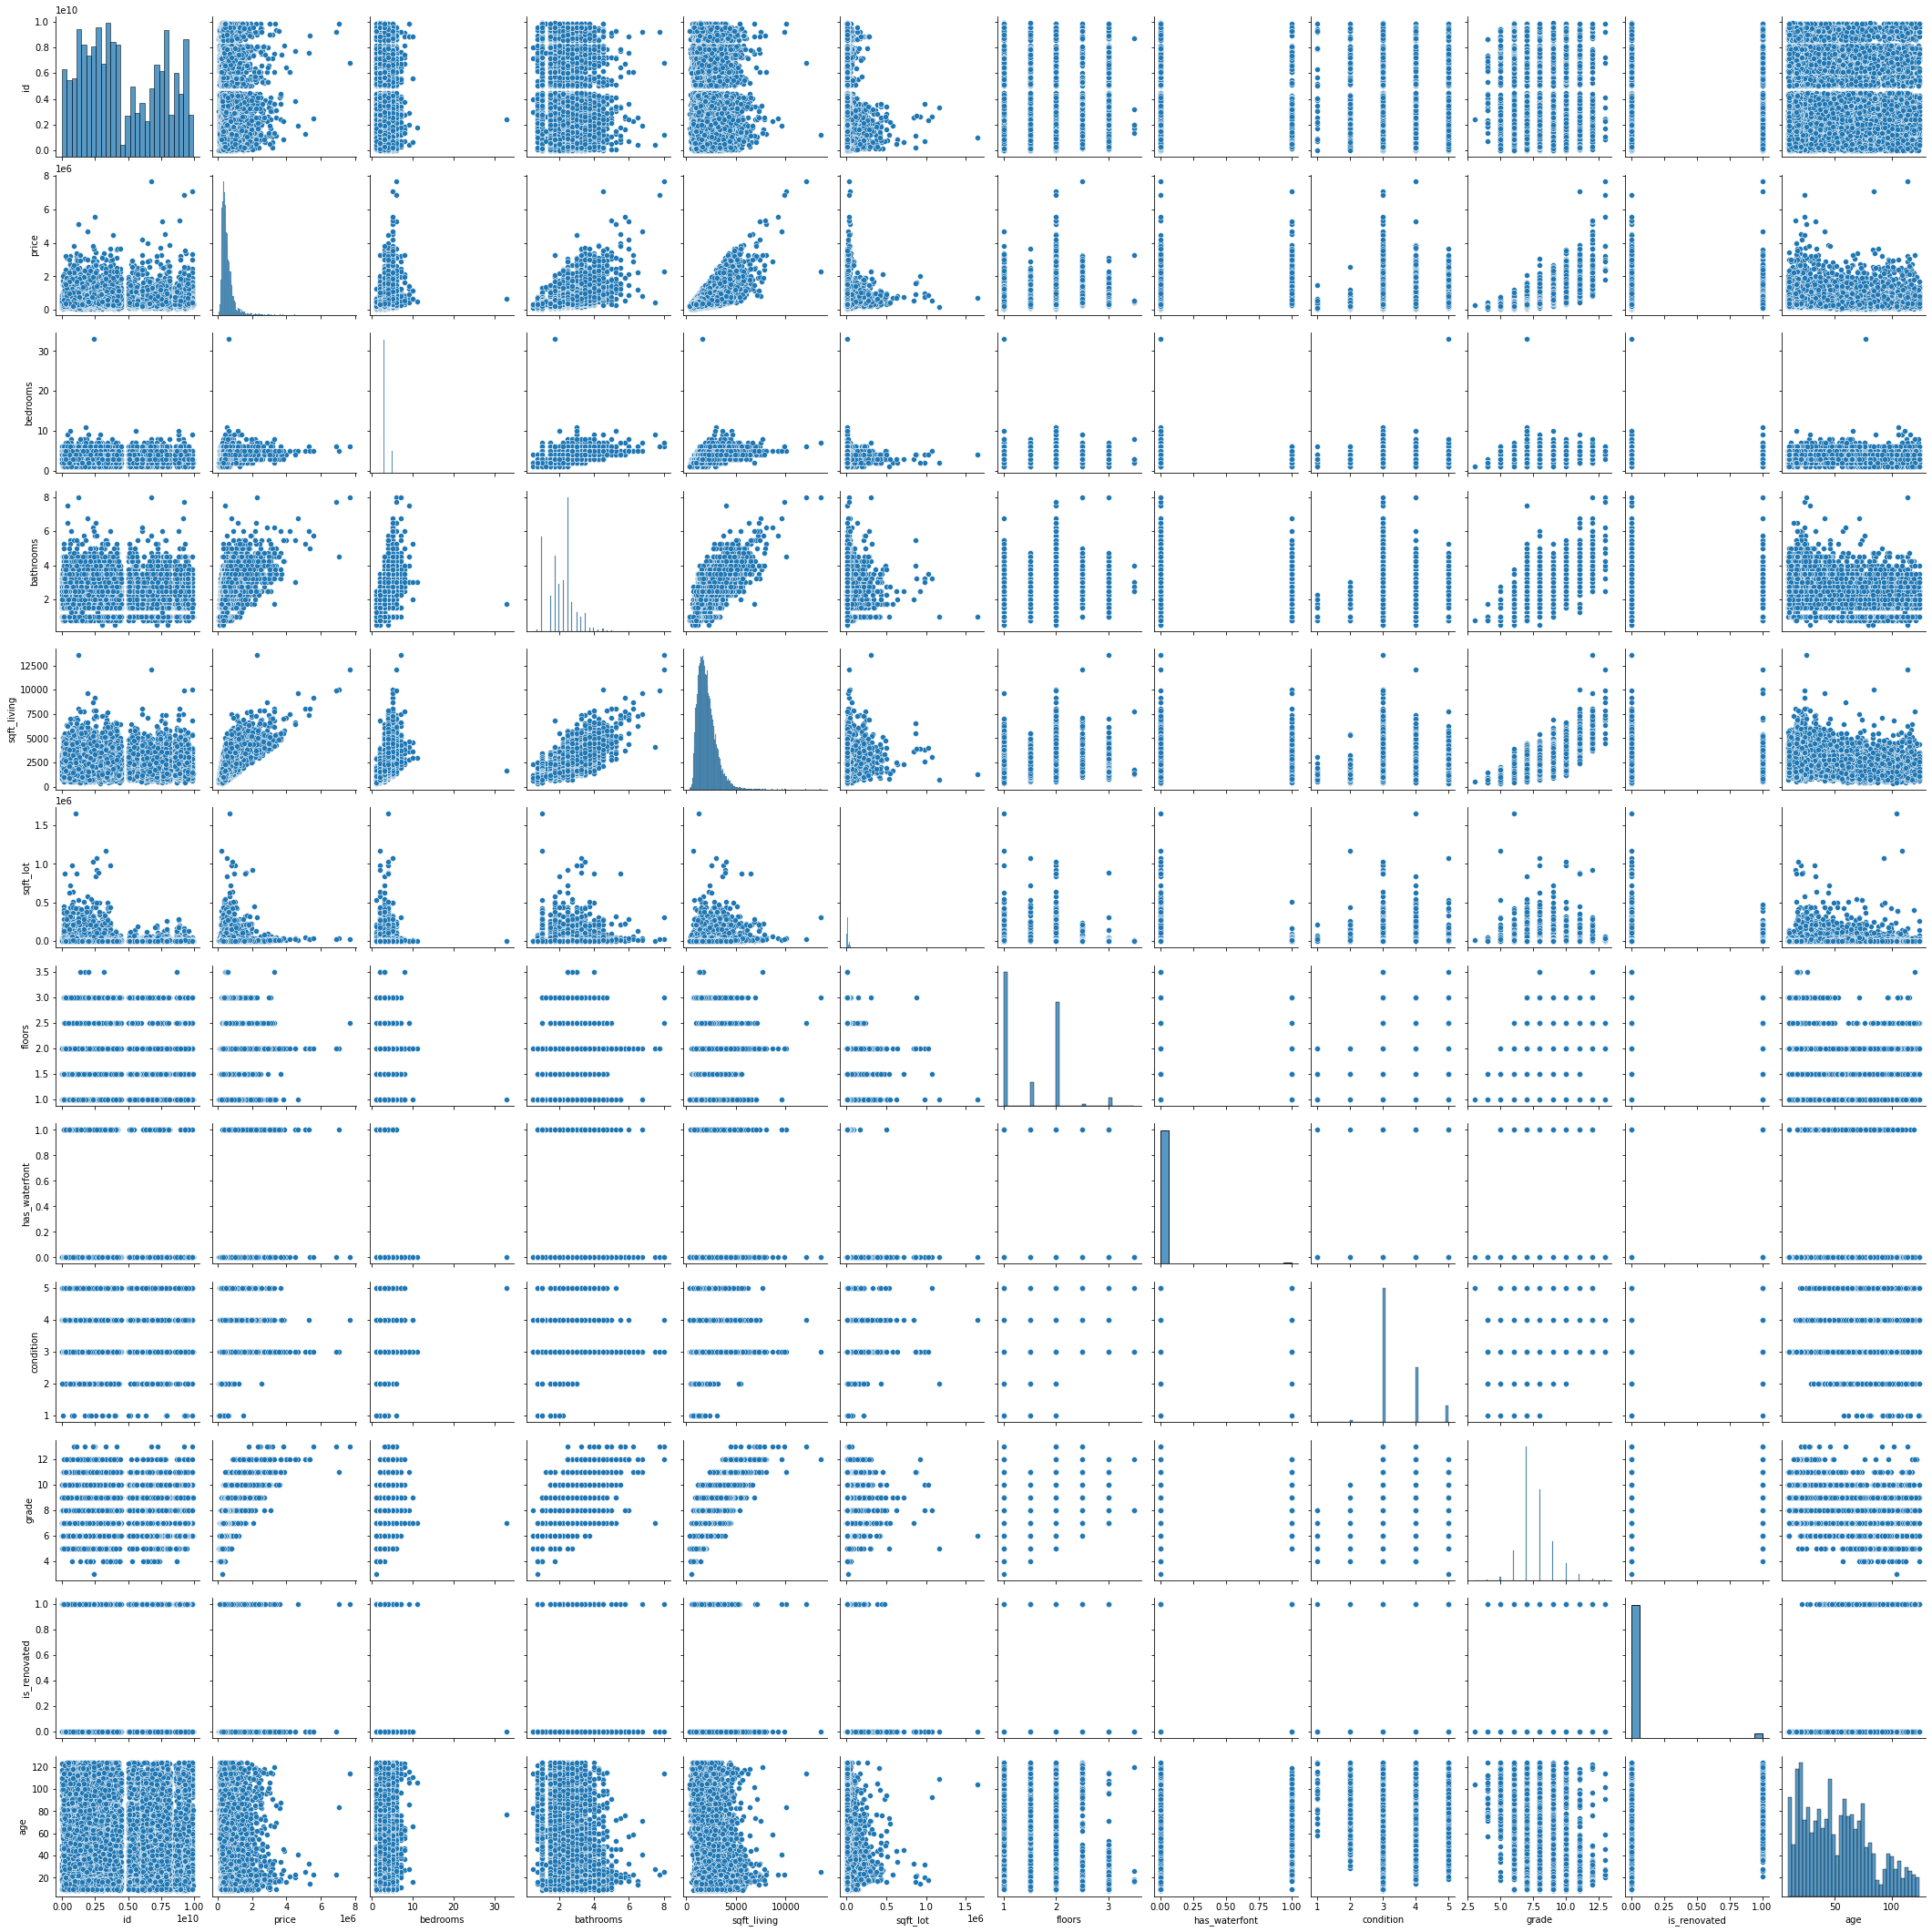

In [18]:
sns.pairplot(data=df)

## Correlation HeatMap

<AxesSubplot:>

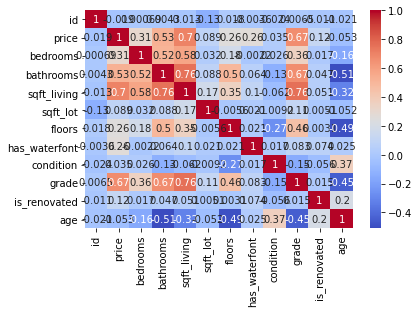

In [19]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [20]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfont,condition,grade,is_renovated,age
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.003628,-0.024300,0.006470,-0.010864,-0.021171
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.264898,0.034779,0.668020,0.118179,-0.052906
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.025893,0.357988,0.017204,-0.155241
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,-0.129362,0.665587,0.047259,-0.506252
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.050623,-0.316646
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.005105,-0.052312
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.003063,-0.488935
has_waterfont,-0.003628,0.264898,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,0.074429,0.024842
condition,-0.024300,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.055836,0.365129
grade,0.006470,0.668020,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.015385,-0.446235


# Feature Selection

In [21]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'has_waterfont', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

In [22]:
# top predictors
# sqft_living, grade, bathrooms, bedrooms, has_waterfront,floors,is_renovated
# we shall also take waterfront and yr_renovated along with them for analysis
# they exhibit some multi collinearity but lets test them out
 # select most important features
df_selected = df[['price','sqft_living','grade','bathrooms','bedrooms','has_waterfont','floors','is_renovated']]
df_selected.head()

,price,sqft_living,grade,bathrooms,bedrooms,has_waterfont,floors,is_renovated
0,221900.0,1180,7,1.00,3,False,1.0,False
1,538000.0,2570,7,2.25,3,False,2.0,True
2,180000.0,770,6,1.00,2,False,1.0,False
3,604000.0,1960,7,3.00,4,False,1.0,False
4,510000.0,1680,8,2.00,3,False,1.0,False


## Add justification later... after modeling

explanation...

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


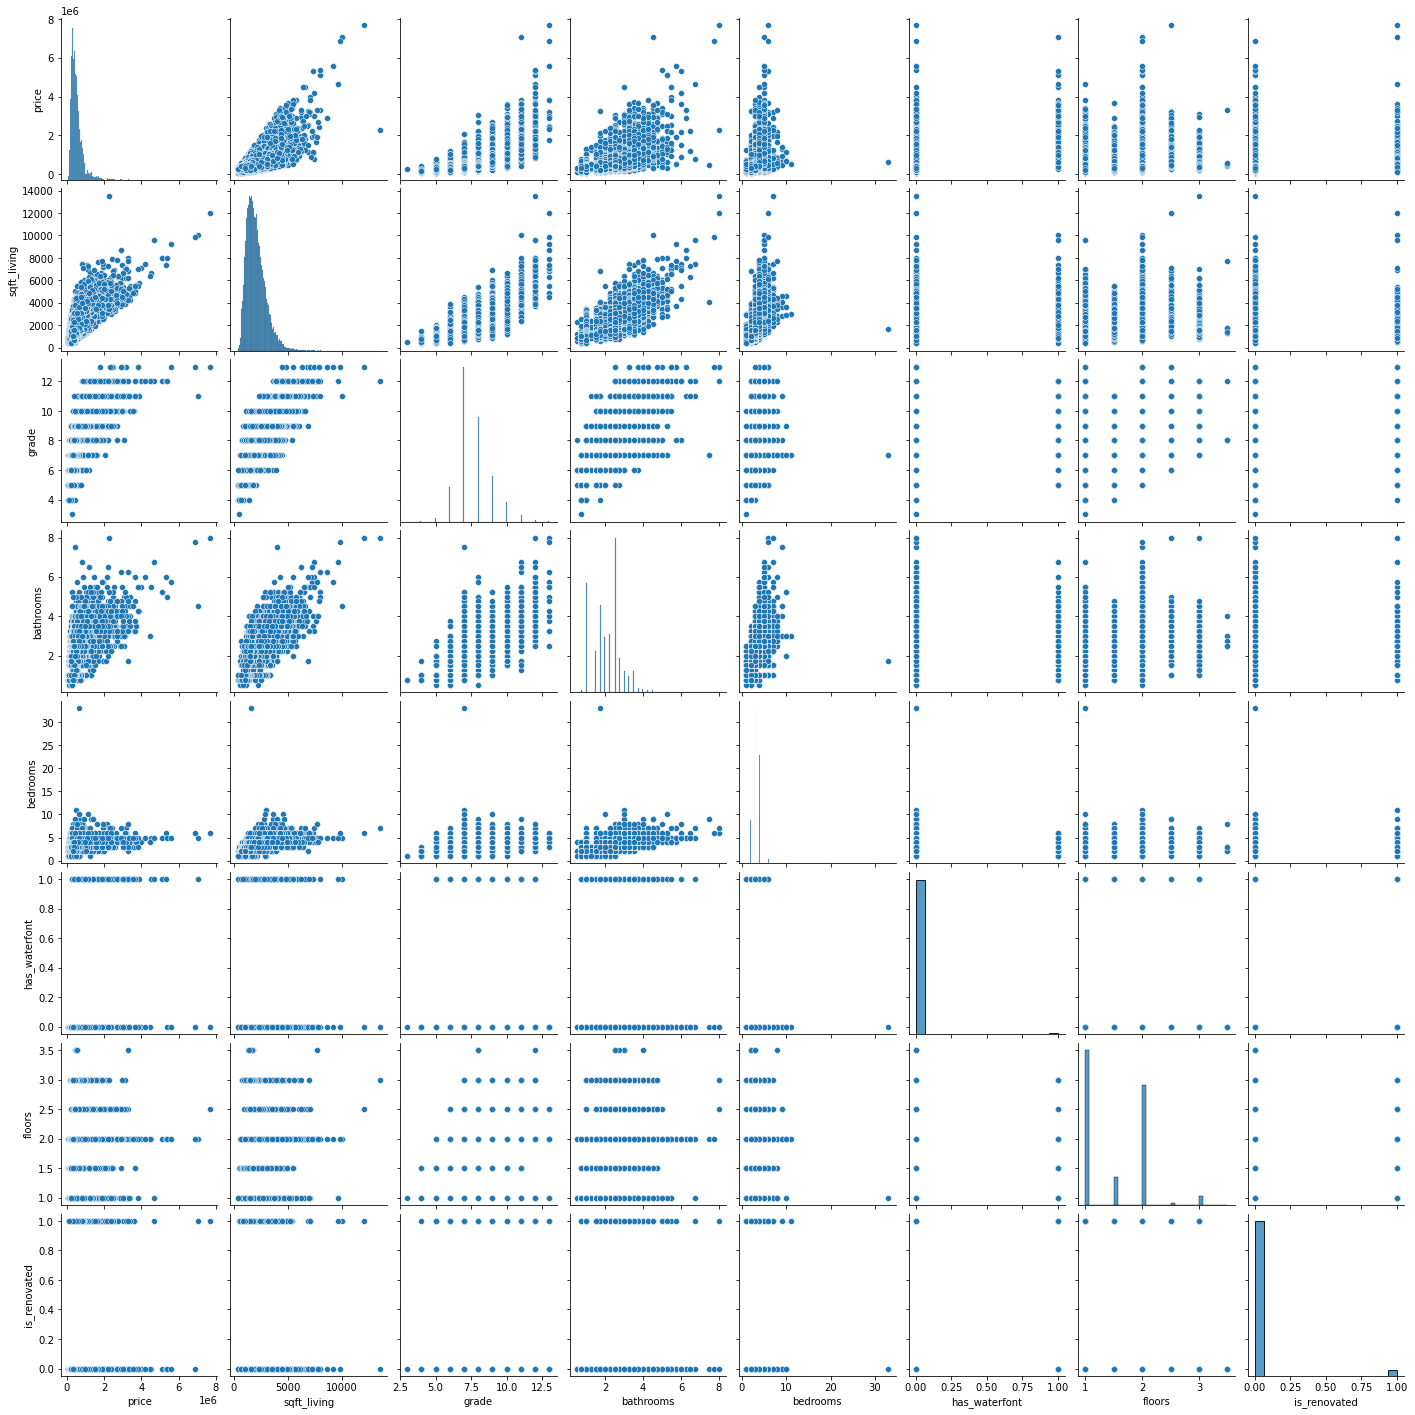

In [23]:
sns.pairplot(data=df_selected)

## Data Cleaning

Checking for outliers

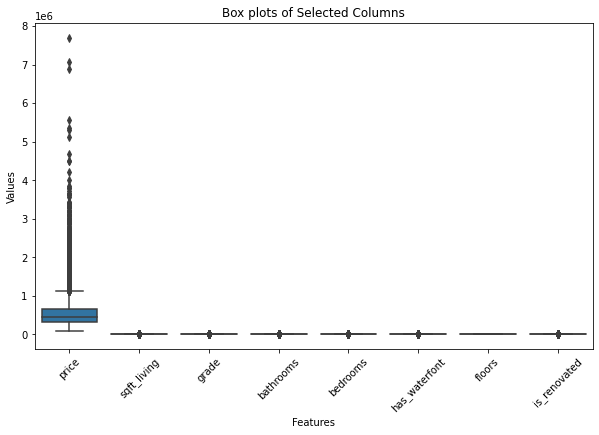

In [24]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [25]:
df_selected.describe()

,price,sqft_living,grade,bathrooms,bedrooms,floors
count,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,2083.132633,7.662792,2.118429,3.373950,1.495985
std,3.679311e+05,918.808412,1.171971,0.768720,0.925405,0.540081
min,7.800000e+04,370.000000,3.000000,0.500000,1.000000,1.000000
25%,3.225000e+05,1430.000000,7.000000,1.750000,3.000000,1.000000
50%,4.500000e+05,1920.000000,7.000000,2.250000,3.000000,1.500000
75%,6.450000e+05,2550.000000,8.000000,2.500000,4.000000,2.000000
max,7.700000e+06,13540.000000,13.000000,8.000000,33.000000,3.500000


In [26]:
#dropping outliers in price and sqft_living, since this are mostly crucial 
#other features dont have much variability

In [27]:
df_selected_outliers = df_selected[['price','sqft_living']]
# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df_selected.index[outliers]

## Remove the outliers 

In [28]:
# droping all columns with outliers 
df_selected = df_selected.drop(outlier_indices)


In [29]:
df_selected.describe()


,price,sqft_living,grade,bathrooms,bedrooms,floors
count,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000
mean,4.737215e+05,1954.195870,7.516646,2.041801,3.321075,1.473999
std,2.051190e+05,732.982251,1.014726,0.696555,0.900340,0.536939
min,7.800000e+04,370.000000,3.000000,0.500000,1.000000,1.000000
25%,3.150000e+05,1400.000000,7.000000,1.500000,3.000000,1.000000
50%,4.350000e+05,1850.000000,7.000000,2.000000,3.000000,1.000000
75%,5.999500e+05,2420.000000,8.000000,2.500000,4.000000,2.000000
max,1.120000e+06,4230.000000,12.000000,7.500000,33.000000,3.500000


## Check for Duplicates

In [30]:
df.duplicated().sum()

0

# Data analysis

## Analysis 1: Important features in a home can be used to create a predictive model for its price

Investigating the most important features in homes to create an accurate model for estimating home value.

In [31]:
df_selected.corr()

,price,sqft_living,grade,bathrooms,bedrooms,has_waterfont,floors,is_renovated
price,1.000000,0.611146,0.620372,0.439868,0.283329,0.048710,0.266459,0.083290
sqft_living,0.611146,1.000000,0.694195,0.707056,0.584342,-0.000952,0.337588,0.020551
grade,0.620372,0.694195,1.000000,0.601648,0.308947,-0.014601,0.455461,-0.013444
bathrooms,0.439868,0.707056,0.601648,1.000000,0.482281,-0.008375,0.501323,0.024868
bedrooms,0.283329,0.584342,0.308947,0.482281,1.000000,-0.025577,0.149039,0.001352
has_waterfont,0.048710,-0.000952,-0.014601,-0.008375,-0.025577,1.000000,-0.006883,0.049065
floors,0.266459,0.337588,0.455461,0.501323,0.149039,-0.006883,1.000000,-0.004292
is_renovated,0.083290,0.020551,-0.013444,0.024868,0.001352,0.049065,-0.004292,1.000000


###  *** Top Predictors** - grade,sqft_living,  bathrooms, bedrooms, has_waterfront,floors,is_renovated
We shall add the features to our progressively while validating to get the best overall model

### Model 1: simple linear regression. Feature - Grade

In [32]:
#DAta Preparations
x_model1 = df_selected[['grade']]
x_model1.head()

y_model1= df_selected['price']
y_model1.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model1,y_model1,test_size=0.2,random_state=42)


# Reshape the arrays to 2D
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)


#Modeling
model1 = LinearRegression()
model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

df_model1= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model1.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 26325133197.18208
mae 128082.70092455712
R2 0.37041103969420264


### Model 2: Multiple linear regression. Features - Grade, Sqft Living

In [33]:
#DAta Preparations
x_model2 = df_selected[['grade','sqft_living']]
x_model2.head()

y_model2= df_selected['price']
y_model2.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model2,y_model2,test_size=0.2,random_state=42)


#Modeling
model2 = LinearRegression()
model2.fit(x_train,y_train)

y_pred = model2.predict(x_test)

df_model2= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model2.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23523328131.76954
mae 120789.5549360436
R2 0.4374186983031787


### Model 3: Multiple linear regression. Features - Grade, Sqft Living, Bathrooms

In [34]:

#DAta Preparations
x_model3 =  df_selected[['grade','sqft_living', 'bathrooms']]
x_model3.head()

y_model3= df_selected['price']
y_model3.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model3,y_model3,test_size=0.2,random_state=42)


#Modeling
model3 = LinearRegression()
model3.fit(x_train,y_train)

y_pred = model3.predict(x_test)

df_model3= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model3.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23409977550.85801
mae 120178.62710425536
R2 0.4401295782007887


### Model 4: Multiple linear regression. Features - Grade, Sqft Living, Bathrooms, Bedrooms

In [35]:

#DAta Preparations
x_model4 =  df_selected[['grade','sqft_living', 'bathrooms','bedrooms']]
x_model4.head()

y_model4= df_selected['price']
y_model4.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model4,y_model4,test_size=0.2,random_state=42)


#Modeling
model4 = LinearRegression()
model4.fit(x_train,y_train)

y_pred = model4.predict(x_test)

df_model4= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model4.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23322864095.89199
mae 119838.64903757676
R2 0.4422129739097447


### Model 5: Multiple linear regression. Features - Grade, Sqft Living, Bathrooms, Bedrooms, Floors

In [36]:

#DAta Preparations
x_model5 =  df_selected[['grade','sqft_living', 'bathrooms','bedrooms','floors']]
x_model5.head()

y_model5= df_selected['price']
y_model5.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model5,y_model5,test_size=0.2,random_state=42)


#Modeling
model5 = LinearRegression()
model5.fit(x_train,y_train)

y_pred = model5.predict(x_test)

df_model5= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model5.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23310340531.715214
mae 119806.01285112658
R2 0.4425124860789832


### Model 6: Multiple linear regression. Features - Grade, Sqft Living, Bathrooms, Bedrooms, Floors, Has Watefronts

In [37]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'has_waterfont', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

In [38]:

#DAta Preparations
x_model6 =  df_selected[['grade','sqft_living', 'bathrooms','bedrooms','floors','has_waterfont']]
x_model6.head()

y_model6= df_selected['price']
y_model6.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model6,y_model6,test_size=0.2,random_state=42)


#Modeling
model6 = LinearRegression()
model6.fit(x_train,y_train)

y_pred = model6.predict(x_test)

df_model6= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model6.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23218180019.120567
mae 119515.69902353403
R2 0.44471658665735825


### Model 7: Multiple linear regression. Features - Grade, Sqft Living, Bathrooms, Bedrooms, Floors, Has Watefronts, Is renovated

In [39]:

#DAta Preparations
x_model7 =  df_selected[['grade','sqft_living', 'bathrooms','bedrooms','floors','has_waterfont','is_renovated']]
x_model7.head()

y_model7= df_selected['price']
y_model7.head()


#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model7,y_model7,test_size=0.2,random_state=42)


#Modeling
model7 = LinearRegression()
model7.fit(x_train,y_train)

y_pred = model7.predict(x_test)

df_model7= pd.DataFrame({"true":y_test,"pred":y_pred})
df_model7.head()

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 23176753520.15733
mae 119447.7613106215
R2 0.44570733820326747


#### The above model is the best, since it has the highest R Squared Value of 0.45 and the least Mean Absolute Error of 119,448

Deriving the final formula of the model

### Linear Regression Formula

The formula for predicting the price (y) can be expressed as:

y = β0 + β1 * grade + β2 * sqft_living + β3 * bathrooms + β4 * bedrooms + β5 * floors + β6 * has_waterfront + β7 * is_renovated

Where:

- β0 is the intercept
- β1, β2, ..., β7 are the coefficients for each feature


In [47]:
coefficients = model7.coef_
intercept = model7.intercept_
intercept, coefficients

(-282656.0741050375,
 array([ 8.06222703e+04,  1.12711929e+02, -1.76924135e+04, -9.54667686e+03,
        -4.64921172e+03,  2.07438649e+05,  1.02886400e+05]))

plugging in the coefficients and intercept

### Linear Regression Formula

The formula for predicting the price (y) can be expressed as:

**y = -282,656.0741 + 80,622.2703 * grade + 112.7119 * sqft_living - 17,692.4135 * bathrooms - 9,546.6769 * bedrooms - 4,649.2117 * floors + 207,438.6490 * has_waterfront + 102,886.4 * is_renovated**

Where:

- **-282,656.0741** is the intercept


Bathrooms, bedrooms, and floors having negative coefficients suggest that, according to the data, increases in these variables are associated with a decrease in house price, all else being equal. While this might seem counterintuitive, it's important to consider a few factors:

- **Multicollinearity**: If bathrooms, bedrooms, and floors are highly correlated with other variables in the model (like square footage or grade), this can lead to unexpected coefficient signs.
- **Data Quality and Sample Size**: The quality and representativeness of your data can affect the model. If the data is skewed or not representative of the population, it might produce unexpected results.


#### Checking for multicollinearity

In [52]:
df_selected.corr()

,price,sqft_living,grade,bathrooms,bedrooms,has_waterfont,floors,is_renovated
price,1.000000,0.611146,0.620372,0.439868,0.283329,0.048710,0.266459,0.083290
sqft_living,0.611146,1.000000,0.694195,0.707056,0.584342,-0.000952,0.337588,0.020551
grade,0.620372,0.694195,1.000000,0.601648,0.308947,-0.014601,0.455461,-0.013444
bathrooms,0.439868,0.707056,0.601648,1.000000,0.482281,-0.008375,0.501323,0.024868
bedrooms,0.283329,0.584342,0.308947,0.482281,1.000000,-0.025577,0.149039,0.001352
has_waterfont,0.048710,-0.000952,-0.014601,-0.008375,-0.025577,1.000000,-0.006883,0.049065
floors,0.266459,0.337588,0.455461,0.501323,0.149039,-0.006883,1.000000,-0.004292
is_renovated,0.083290,0.020551,-0.013444,0.024868,0.001352,0.049065,-0.004292,1.000000


#### As can be seen bathrooms, bedrooms and floors exhibit higher correlations with sqft and the grade than they do with price. This could be the reason as to why they have negative values in our models although they are all individually positively correlated to the price

## Analysis 2, Relationship between Renovations and Property Value



Determining whether renovations significantly affects home prices. 

First, let's look at the scatter plot of the 2 variables

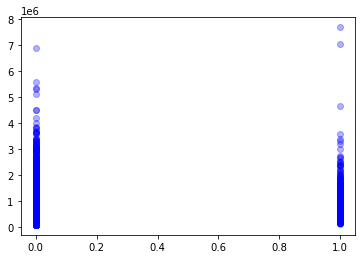

In [41]:
plt.scatter(df['is_renovated'], df['price'], color='blue', label='Data Points', alpha =0.3)

This does not show the relationship clearly. Comparing the means.

In [42]:
# split into 2 dataframes, one with renovated houses, the other without
df_with_renovation = df_selected[df_selected['is_renovated']== True]
df_without_renovation =  df_selected[df_selected['is_renovated']== False]


In [46]:
print(f"Houses with Renovations:Mean Price = {df_with_renovation['price'].mean()}  Mode Price = {df_with_renovation['price'].mode()}")
print(f"Houses without Renovations:Mean Price = {df_without_renovation['price'].mean()}  Mode Price = {df_without_renovation['price'].mode()}")

print(f"Difference:Mean Price = {df_with_renovation['price'].mean()-df_without_renovation['price'].mean()}  Mode Price = {df_with_renovation['price'].mode()- df_without_renovation['price'].mode()}")


Houses with Renovations:Mean Price = 569789.6233766234  Mode Price = 0    550000.0
dtype: float64
Houses without Renovations:Mean Price = 470683.4846244674  Mode Price = 0    350000.0
dtype: float64
Difference:Mean Price = 99106.138752156  Mode Price = 0    200000.0
dtype: float64


#### As can clearly be seen above, renovated houses are sold, on average, higher than the unrenovated houses

#### In order to bring out their differences clearly, we shall compare the formula of predicting the value with and without renovations



The formula for predicting the price (y) :

**y = -282,656.0741 + 80,622.2703 * grade + 112.7119 * sqft_living - 17,692.4135 * bathrooms - 9,546.6769 * bedrooms - 4,649.2117 * floors + 207,438.6490 * has_waterfront + 102,886.4 * is_renovated**

Where:

- **-282,656.0741** is the intercept


From the formula above, it can be seen that renovations improve the value of a home on average by **102, 886.4**

## Conclusion